In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
keras.backend.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [3]:
train_data= pd.read_csv('./Datasets/train.csv')
test_data= pd.read_csv('./Datasets/test.csv')

In [6]:
imagesize= 28*28
X_train = train_data.drop("label", axis = 1).copy()
X_test = test_data.copy()
Y_train = train_data["label"].copy()
X_train.describe()
X_train= X_train/255.0
Y_train= Y_train/255.0
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

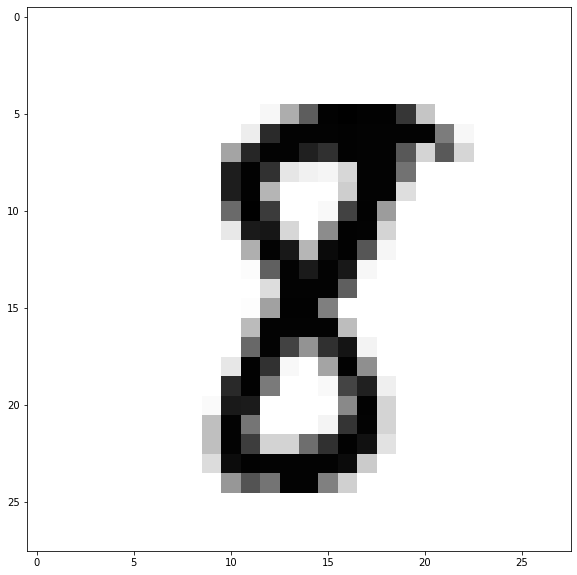

In [8]:
import random
no_images=len(X_train)
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(X_train[random.randint(0,no_images), :, :, 0], cmap='Greys', interpolation='nearest') 
plt.show()

In [9]:
validation_size = 0.2

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = validation_size)

In [10]:
Y_train = keras.utils.to_categorical(Y_train, num_classes = 10)
Y_val = keras.utils.to_categorical(Y_val, num_classes = 10)

In [23]:
def CNN():
    model = Sequential()

    model.add(Conv2D(filters = 32, kernel_size = (4,4), input_shape = (28,28,1), activation = "relu"))
    model.add(MaxPool2D(pool_size = (2,2)))

    model.add(Flatten())

    model.add(Dense(128, activation = "relu"))
    model.add(Dense(256, activation = "relu"))
    model.add(Dense(512, activation = "relu"))
    
    model.add(Dense(10, activation = "softmax"))


    
    return model

In [27]:
model= CNN()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 4608)              0         
                                                                 
 dense_16 (Dense)            (None, 128)               589952    
                                                                 
 dense_17 (Dense)            (None, 256)               33024     
                                                                 
 dense_18 (Dense)            (None, 512)               131584    
                                                      

In [30]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = "val_loss", patience = 1)
from timeit import default_timer as timer
import keras
class TimingCallback(keras.callbacks.Callback):
    def __init__(self, logs={}):
        self.logs=[]
    def on_epoch_begin(self, epoch, logs={}):
        self.starttime = timer()
    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(float("{:.2f}".format(timer()-self.starttime)))

cb = TimingCallback()

In [31]:
def predict(model, X, imgs):
    s = int(np.sqrt(imgs))
    fig, ax = plt.subplots(s, s, sharex=True, sharey=True, figsize=(15, 15))
    ax = ax.flatten()
    preds = model.predict(X[:imgs])
    for i in range(imgs):
        y_pred = np.argmax(preds[i])
        img = X[i].reshape(28, 28)
        ax[i].imshow(img, cmap='Greys', interpolation='nearest')
        ax[i].set_title(f'p: {y_pred}')

In [38]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Reshape, Conv2D, AveragePooling2D, Flatten
from keras.layers import MaxPooling2D


In [40]:
model_name = "LaNet5"
model = Sequential()
model.add(Reshape(target_shape=(1, 28, 28), input_shape=(784,)))
model.add(Conv2D(kernel_size=(3, 3), filters=6, padding="same", data_format="channels_first", kernel_initializer="uniform", use_bias=False))
model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))
model.add(Conv2D(kernel_size=(5, 5), filters=16, padding="same", data_format="channels_first", kernel_initializer="uniform", use_bias=False))
model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))
model.add(Conv2D(kernel_size=(5, 5), filters=120, padding="same", data_format="channels_first", kernel_initializer="uniform", use_bias=False))
model.add(Flatten())
model.add(Dense(output_dim=120, activation='relu'))
model.add(Dense(output_dim=120, activation='relu'))
model.add(Dense(output_dim=10, activation='softmax'))

adam = keras.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

model.fit(x_train, y_train, epochs=30, batch_size=64)

TypeError: __init__() missing 1 required positional argument: 'units'

In [32]:
batch_sizes= [1, 8, 16, 32, 64, 256,
              X_train.shape[0]]
loss_values= []
for batch in batch_sizes: 
    model = CNN()
    model.compile(optimizer = "Adam", loss = "CategoricalCrossentropy", metrics = "accuracy")
    model.fit(X_train, Y_train, validation_data = (X_val, Y_val), batch_size = batch, epochs = 1, 
              verbose = 1, callbacks = [cb])
    loss_values.append(model.history.history['loss'][0])

1/1 [==============================] - 6s 6s/step - loss: 2.3639 - accuracy: 0.0000e+00 - val_loss: 1.8847 - val_accuracy: 1.0000


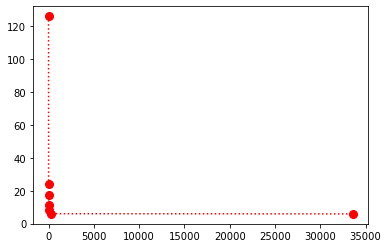

In [33]:
plt.plot(batch_sizes, np.array(cb.logs), 'r-o', markersize= 8, linestyle= 'dotted')
plt.show();

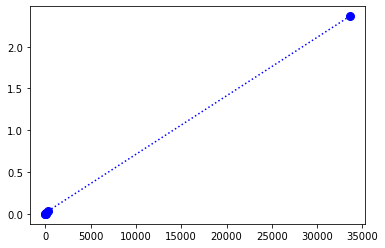

In [34]:
plt.plot(batch_sizes, loss_values, 'b-o', markersize= 8, linestyle= 'dotted')
plt.show();